### Requirements

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('/Users/BALAVIGNESH S S/images', format=fig_extension, dpi=resolution)

### Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sweetviz as sv
import xgboost
from xgboost import XGBRegressor


### Get the data

In [4]:
train = pd.read_csv("train-2.csv")
train.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35


### Data types

In [5]:
train['Departure_Time'] = pd.to_datetime(train['Departure_Time'], format='%H:%M').dt.time
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'], format='%H:%M').dt.time
train.head()


,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,08:23:00,20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28:00,01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30:00,15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24:00,01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59:00,06:04:00,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35


In [6]:
train.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [7]:
import pandas as pd


# Define data types for columns
data_types = {
    'Flight_ID': 'object',
    'Airline': 'category',
    'Departure_City': 'object',
    'Arrival_City': 'object',
    'Distance': 'float64',
    'Departure_Time': 'object',
    'Arrival_Time': 'object',
    'Duration': 'float64',
    'Aircraft_Type': 'category',
    'Number_of_Stops': 'int64',
    'Day_of_Week': 'category',
    'Month_of_Travel': 'category',
    'Holiday_Season': 'category',
    'Demand': 'category',
    'Weather_Conditions': 'category',
    'Passenger_Count': 'int64',
    'Promotion_Type': 'category',
    'Fuel_Price': 'float64',
    'Flight_Price': 'float64'
}

# Apply data types to DataFrame columns
train = train.astype(data_types)

# Print the data types of the DataFrame columns
print(train.dtypes)

Flight_ID               object
Airline               category
Departure_City          object
Arrival_City            object
Distance               float64
Departure_Time          object
Arrival_Time            object
Duration               float64
Aircraft_Type         category
Number_of_Stops          int64
Day_of_Week           category
Month_of_Travel       category
Holiday_Season        category
Demand                category
Weather_Conditions    category
Passenger_Count          int64
Promotion_Type        category
Fuel_Price             float64
Flight_Price           float64
dtype: object


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Flight_ID           45000 non-null  object  
 1   Airline             41427 non-null  category
 2   Departure_City      44660 non-null  object  
 3   Arrival_City        44814 non-null  object  
 4   Distance            44909 non-null  float64 
 5   Departure_Time      45000 non-null  object  
 6   Arrival_Time        45000 non-null  object  
 7   Duration            45000 non-null  float64 
 8   Aircraft_Type       44957 non-null  category
 9   Number_of_Stops     45000 non-null  int64   
 10  Day_of_Week         44775 non-null  category
 11  Month_of_Travel     44733 non-null  category
 12  Holiday_Season      35980 non-null  category
 13  Demand              44683 non-null  category
 14  Weather_Conditions  44698 non-null  category
 15  Passenger_Count     45000 non-null  

In [9]:
data = train.copy() # Copied data from the train

In [10]:
data.shape

(45000, 19)

In [11]:
# check for all the columns present
column_names = np.array(data.columns)
print(column_names)

['Flight_ID' 'Airline' 'Departure_City' 'Arrival_City' 'Distance'
 'Departure_Time' 'Arrival_Time' 'Duration' 'Aircraft_Type'
 'Number_of_Stops' 'Day_of_Week' 'Month_of_Travel' 'Holiday_Season'
 'Demand' 'Weather_Conditions' 'Passenger_Count' 'Promotion_Type'
 'Fuel_Price' 'Flight_Price']


### Exploratory Data Analysis (EDA)

In [12]:
data.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

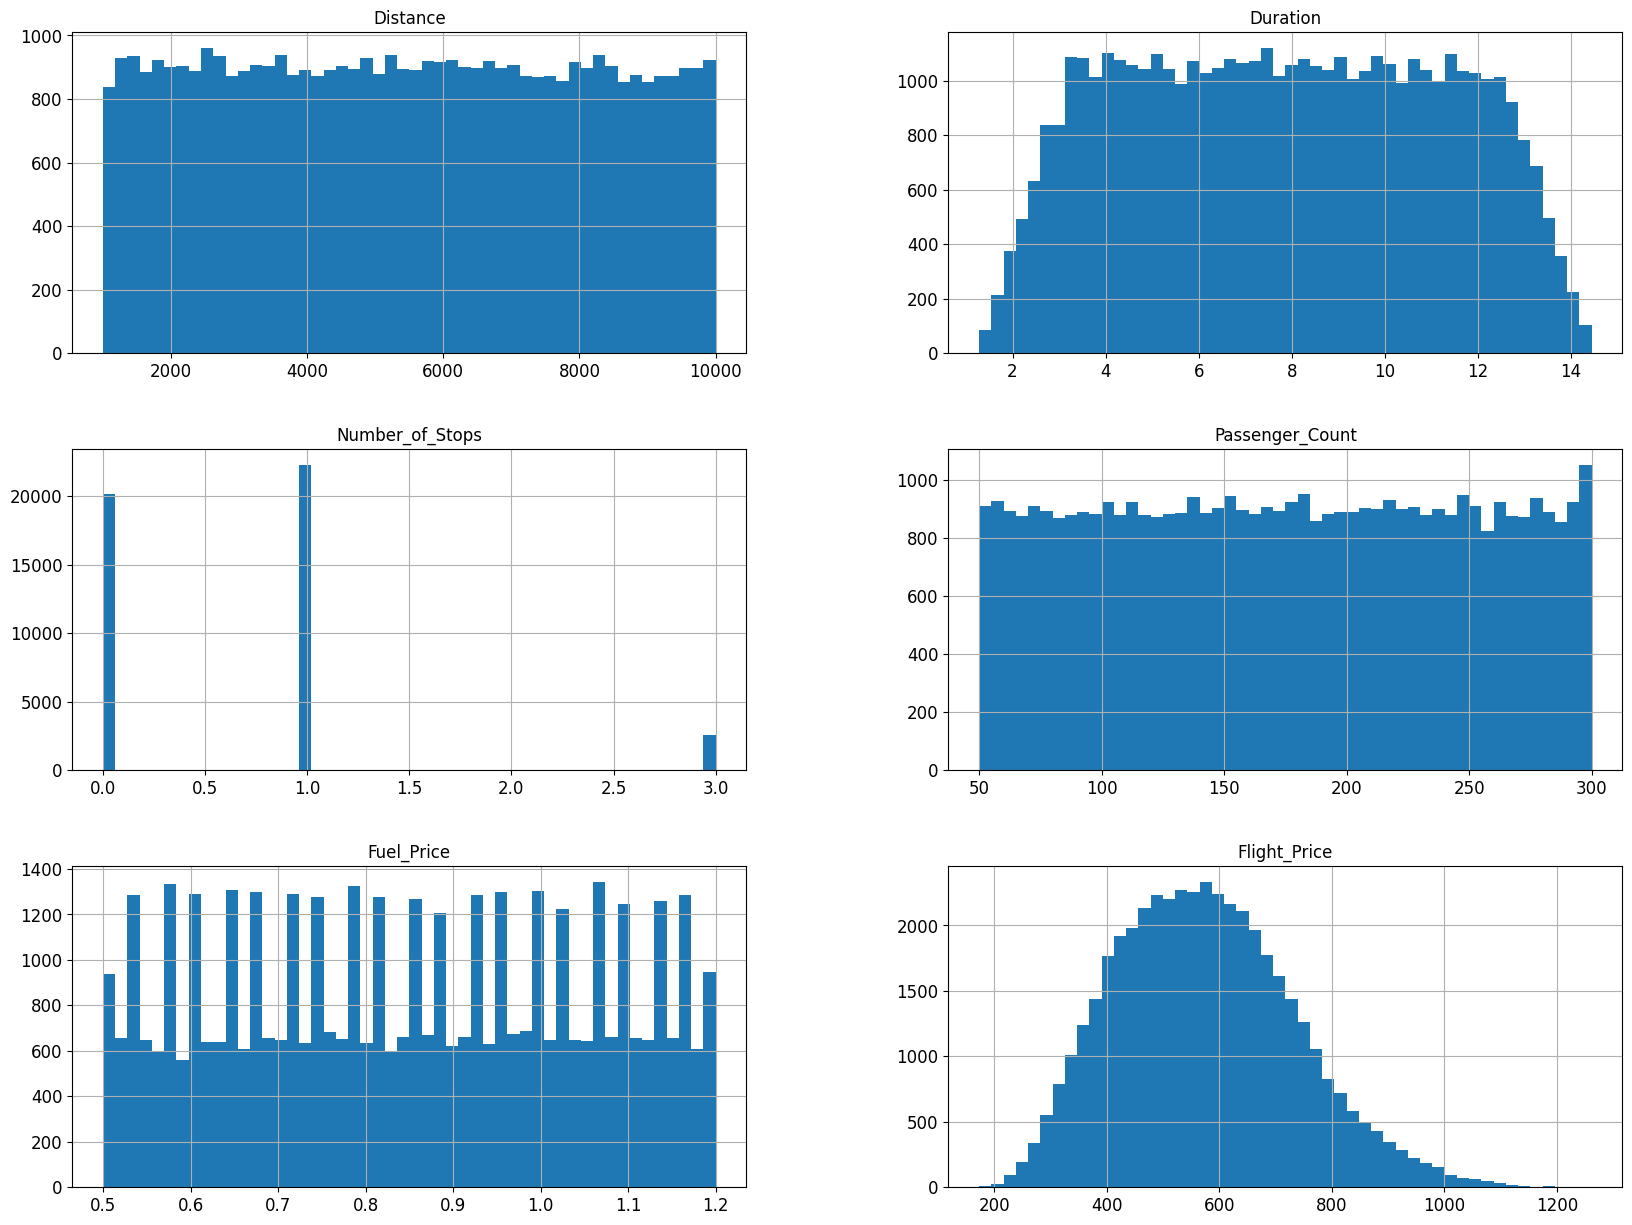

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Promotion_Type,33.811111
Holiday_Season,20.044444
Airline,7.940000
Departure_City,0.755556
Demand,0.704444
Weather_Conditions,0.671111
Month_of_Travel,0.593333
Day_of_Week,0.500000
Arrival_City,0.413333
Distance,0.202222


In [15]:
describe_result = data.describe(percentiles=[.25, .5, .75, .95, 0.99, 1])

describe_result

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
95%,9554.600000,13.000000,3.000000,288.000000,1.160000,857.502500
99%,9909.000000,13.810000,3.000000,298.000000,1.190000,989.130000
100%,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


### Create Train and Validation dataset

In [16]:
flight_price_ranges = [0., 455, 565, 679, 1267, np.inf]
flight_price_labels = [1, 2, 3, 4, 5]

data["Flight_Price_Bin"] = pd.cut(data["Flight_Price"],
                                  bins=flight_price_ranges,
                                  labels=flight_price_labels)

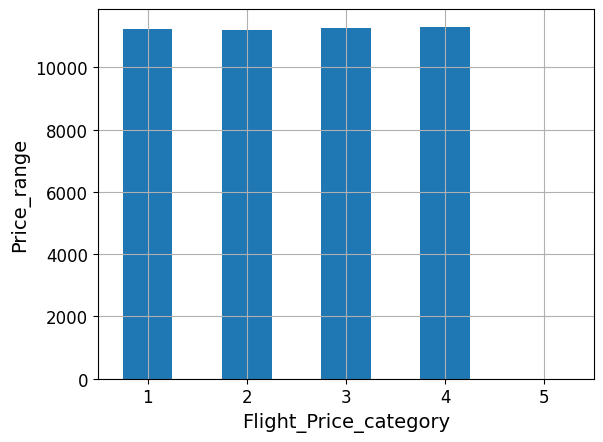

In [17]:
data["Flight_Price_Bin"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Flight_Price_category")
plt.ylabel("Price_range")
plt.show()

In [18]:
strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, stratify=data["Flight_Price_Bin"], random_state=42)

In [19]:
strat_test_set["Flight_Price_Bin"].value_counts() / len(strat_test_set)

Flight_Price_Bin
4    0.251222
3    0.250444
1    0.249556
2    0.248778
5    0.000000
Name: count, dtype: float64

### Correlation

In [20]:
# Select only numeric columns for correlation analysis
numeric_columns = strat_train_set.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
corr_matrix


,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
Distance,1.000000,0.984531,0.175076,0.005562,-0.003731,0.763651
Duration,0.984531,1.000000,0.171833,0.006610,-0.003954,0.759486
Number_of_Stops,0.175076,0.171833,1.000000,0.011867,0.000376,0.343399
Passenger_Count,0.005562,0.006610,0.011867,1.000000,-0.000869,0.005371
Fuel_Price,-0.003731,-0.003954,0.000376,-0.000869,1.000000,0.350640
Flight_Price,0.763651,0.759486,0.343399,0.005371,0.350640,1.000000


In [21]:
corr_matrix["Flight_Price"].sort_values(ascending=False)

Flight_Price       1.000000
Distance           0.763651
Duration           0.759486
Fuel_Price         0.350640
Number_of_Stops    0.343399
Passenger_Count    0.005371
Name: Flight_Price, dtype: float64

### Data visualization

In [22]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Preparing the data for Machine Learning Algorithms

In [23]:
Pricing = data.copy()
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Flight_ID           45000 non-null  object  
 1   Airline             41427 non-null  category
 2   Departure_City      44660 non-null  object  
 3   Arrival_City        44814 non-null  object  
 4   Distance            44909 non-null  float64 
 5   Departure_Time      45000 non-null  object  
 6   Arrival_Time        45000 non-null  object  
 7   Duration            45000 non-null  float64 
 8   Aircraft_Type       44957 non-null  category
 9   Number_of_Stops     45000 non-null  int64   
 10  Day_of_Week         44775 non-null  category
 11  Month_of_Travel     44733 non-null  category
 12  Holiday_Season      35980 non-null  category
 13  Demand              44683 non-null  category
 14  Weather_Conditions  44698 non-null  category
 15  Passenger_Count     45000 non-null  

In [24]:
# Data Cleaning

Pricing.dropna(inplace = True)
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20998 entries, 6 to 44997
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Flight_ID           20998 non-null  object  
 1   Airline             20998 non-null  category
 2   Departure_City      20998 non-null  object  
 3   Arrival_City        20998 non-null  object  
 4   Distance            20998 non-null  float64 
 5   Departure_Time      20998 non-null  object  
 6   Arrival_Time        20998 non-null  object  
 7   Duration            20998 non-null  float64 
 8   Aircraft_Type       20998 non-null  category
 9   Number_of_Stops     20998 non-null  int64   
 10  Day_of_Week         20998 non-null  category
 11  Month_of_Travel     20998 non-null  category
 12  Holiday_Season      20998 non-null  category
 13  Demand              20998 non-null  category
 14  Weather_Conditions  20998 non-null  category
 15  Passenger_Count     20998 non-null  int64

### Encoding and Feature Scaling

In [25]:
# Success method
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    Pricing[col] = label_encoder.fit_transform(Pricing[col])

Pricing.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Flight_Price_Bin
6,F7,Airline B,West Samanthaland,Port Brentport,3274.0,16:21:00,21:57:00,5.60,Boeing 787,0,6,4,1,1,Clear,248,1,1.03,429.53,1
9,F10,Airline B,Suechester,Clintonhaven,8677.0,05:32:00,17:01:00,11.49,Airbus A380,0,0,5,2,1,Snow,236,1,0.80,652.88,3
10,F11,Airline A,Larsenchester,Kathyside,2275.0,17:26:00,20:58:00,3.54,Airbus A320,0,1,1,3,2,Cloudy,295,1,1.11,550.52,2
12,F13,Airline C,Richardsonton,Maryview,9363.0,21:22:00,09:24:00,12.04,Airbus A320,1,4,0,3,2,Cloudy,243,1,1.02,825.53,4
16,F17,Airline A,Lake Adamview,Angelaburgh,2345.0,03:21:00,08:12:00,4.86,Airbus A320,1,0,9,2,0,Clear,232,1,0.82,538.76,2


In [26]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
Pricing = pd.get_dummies(Pricing, columns=categorical_cols, drop_first=True)


In [27]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
Pricing = looe_encoder.fit_transform(Pricing, Pricing['Flight_Price'])

In [28]:
# Define the columns to be scaled
numeric_cols = ['Distance', 'Number_of_Stops', 'Passenger_Count', 'Fuel_Price']

# Apply standard scaling
scaler = StandardScaler()
Pricing[numeric_cols] = scaler.fit_transform(Pricing[numeric_cols])


In [29]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
Pricing.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
Pricing.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price_Bin,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
6,575.507707,575.507707,-0.854406,5.60,-0.882959,6,4,1,1,1.008231,...,1,True,False,False,False,False,True,False,False,False
9,575.507707,575.507707,1.231179,11.49,-0.882959,0,5,2,1,0.842473,...,3,True,False,True,False,False,False,False,False,True
10,575.507707,575.507707,-1.240025,3.54,-0.882959,1,1,3,2,1.657448,...,2,False,False,False,False,False,False,True,False,False
12,575.507707,583.930000,1.495978,12.04,0.443817,4,0,3,2,0.939165,...,4,False,True,False,False,False,False,True,False,False
16,575.507707,268.120000,-1.213005,4.86,0.443817,0,9,2,0,0.787220,...,2,False,False,False,False,False,False,False,False,False


In [30]:
Pricing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20998 entries, 6 to 44997
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Departure_City             20998 non-null  float64 
 1   Arrival_City               20998 non-null  float64 
 2   Distance                   20998 non-null  float64 
 3   Duration                   20998 non-null  float64 
 4   Number_of_Stops            20998 non-null  float64 
 5   Day_of_Week                20998 non-null  int32   
 6   Month_of_Travel            20998 non-null  int32   
 7   Holiday_Season             20998 non-null  int32   
 8   Demand                     20998 non-null  int32   
 9   Passenger_Count            20998 non-null  float64 
 10  Promotion_Type             20998 non-null  int32   
 11  Fuel_Price                 20998 non-null  float64 
 12  Flight_Price               20998 non-null  float64 
 13  Flight_Price_Bin           20998 non

### Selecting Train and Test Model

In [31]:
Pricing.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price_Bin,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
6,575.507707,575.507707,-0.854406,5.60,-0.882959,6,4,1,1,1.008231,...,1,True,False,False,False,False,True,False,False,False
9,575.507707,575.507707,1.231179,11.49,-0.882959,0,5,2,1,0.842473,...,3,True,False,True,False,False,False,False,False,True
10,575.507707,575.507707,-1.240025,3.54,-0.882959,1,1,3,2,1.657448,...,2,False,False,False,False,False,False,True,False,False
12,575.507707,583.930000,1.495978,12.04,0.443817,4,0,3,2,0.939165,...,4,False,True,False,False,False,False,True,False,False
16,575.507707,268.120000,-1.213005,4.86,0.443817,0,9,2,0,0.787220,...,2,False,False,False,False,False,False,False,False,False


In [32]:
strat_train_set, strat_test_set = train_test_split(Pricing, test_size=0.1, stratify=Pricing["Flight_Price_Bin"], random_state=42)

In [33]:
columns_to_drop = ['Flight_Price', 'Flight_Price_Bin']

X_train=strat_train_set.drop(columns=columns_to_drop)
y_train=strat_train_set['Flight_Price']

X_test=strat_test_set.drop(columns=columns_to_drop)
y_test=strat_test_set['Flight_Price']

### XG Boost

Model

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

In [35]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,       # Try a higher max_depth
    'learning_rate': 0.05, # Try a smaller learning rate
    'n_estimators': 42,  # Increase the number of boosting rounds
    'objective': 'reg:squarederror',
    'lambda': 0.1,        # Experiment with the lambda value
    'alpha': 0.1,        # Experiment with the alpha value
    'subsample': 0.6,      # Adjust the subsample value
    'colsample_bytree': 0.6,# Adjust the colsample_bytree value
    'booster':'gbtree',
    'tree_method':'exact'

}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=400,  # You can adjust the number of boosting rounds
    nfold=14,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=8,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(dtest)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)


[11:24:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

[11:25:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.



Root Mean Squared Error (RMSE): 11.778146457049758


### Evaluating the system on the Test set

Preparing the test data

In [36]:
test = pd.read_csv("test.csv")

In [37]:
test

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,NaN,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,NaN,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,NaN,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,NaN,Low,Rain,223,NaN,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F49996,Airline B,Port Kristin,Jeffreyhaven,9389.0,22:41,11:02,12.35,Boeing 777,1,Tuesday,March,NaN,High,Cloudy,143,Special Offer,0.51
4996,F49997,NaN,NaN,Lake Christopherville,7718.0,11:20,22:53,11.55,Airbus A320,1,Friday,September,Spring,Low,Rain,55,Special Offer,0.50
4997,F49998,Airline C,Port Richard,Callahanmouth,2597.0,16:26,21:21,4.93,Airbus A380,1,Friday,September,Fall,Low,Snow,145,Discount,0.55
4998,F49999,Airline B,Perrymouth,South Zachary,4659.0,6:13,13:55,7.71,Airbus A380,1,Friday,August,Fall,High,Cloudy,163,Special Offer,0.79


In [38]:
test['Departure_Time'] = pd.to_datetime(test['Departure_Time'], format='%H:%M').dt.time
test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time'], format='%H:%M').dt.time
test.head()


,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43:00,00:14:00,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,NaN,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,01:16:00,13:04:00,11.80,Airbus A380,1,Thursday,April,NaN,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17:00,21:52:00,9.59,Boeing 777,1,Sunday,January,NaN,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,00:11:00,10:23:00,10.21,Airbus A380,0,Thursday,March,NaN,Low,Rain,223,NaN,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,03:22:00,05:13:00,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [40]:
import pandas as pd


# Define data types for columns
data_types = {
    'Flight_ID': 'object',
    'Airline': 'category',
    'Departure_City': 'object',
    'Arrival_City': 'object',
    'Distance': 'float64',
    'Departure_Time': 'object',
    'Arrival_Time': 'object',
    'Duration': 'float64',
    'Aircraft_Type': 'category',
    'Number_of_Stops': 'int64',
    'Day_of_Week': 'category',
    'Month_of_Travel': 'category',
    'Holiday_Season': 'category',
    'Demand': 'category',
    'Weather_Conditions': 'category',
    'Passenger_Count': 'int64',
    'Promotion_Type': 'category',
    'Fuel_Price': 'float64',

}

# Apply data types to DataFrame columns
test = test.astype(data_types)

# Print the data types of the DataFrame columns
print(test.dtypes)

Flight_ID               object
Airline               category
Departure_City          object
Arrival_City            object
Distance               float64
Departure_Time          object
Arrival_Time            object
Duration               float64
Aircraft_Type         category
Number_of_Stops          int64
Day_of_Week           category
Month_of_Travel       category
Holiday_Season        category
Demand                category
Weather_Conditions    category
Passenger_Count          int64
Promotion_Type        category
Fuel_Price             float64
dtype: object


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Flight_ID           5000 non-null   object  
 1   Airline             4573 non-null   category
 2   Departure_City      4961 non-null   object  
 3   Arrival_City        4970 non-null   object  
 4   Distance            4991 non-null   float64 
 5   Departure_Time      5000 non-null   object  
 6   Arrival_Time        5000 non-null   object  
 7   Duration            5000 non-null   float64 
 8   Aircraft_Type       4992 non-null   category
 9   Number_of_Stops     5000 non-null   int64   
 10  Day_of_Week         4975 non-null   category
 11  Month_of_Travel     4966 non-null   category
 12  Holiday_Season      4013 non-null   category
 13  Demand              4966 non-null   category
 14  Weather_Conditions  4951 non-null   category
 15  Passenger_Count     5000 non-null   in

In [42]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
test = looe_encoder.fit_transform(test, test['Distance'])

In [43]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    test[col] = label_encoder.fit_transform(test[col])


In [44]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

In [45]:
# Define the columns to be scaled
numeric_cols = ['Distance', 'Number_of_Stops', 'Passenger_Count', 'Fuel_Price']

# Apply standard scaling
scaler = StandardScaler()
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])

In [46]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
test.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
test.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.673212,-0.904088,5.52,0.448898,2,1,2,2,-0.890900,...,0.485562,True,False,False,True,False,False,False,False,False
1,5460.673212,5460.673212,1.261435,11.80,0.448898,4,0,4,0,1.647034,...,0.977653,False,False,True,False,False,False,False,False,False
2,5460.673212,5460.673212,0.345752,9.59,0.448898,3,4,4,1,0.659297,...,-1.089127,False,True,False,False,True,False,False,True,False
3,5460.673212,5460.673212,0.908161,10.21,-0.901578,4,7,4,1,0.659297,...,0.141099,False,False,True,False,False,False,False,True,False
4,5460.673212,5460.673212,-1.656133,1.86,0.448898,2,1,2,0,-0.410750,...,1.272907,True,False,False,False,False,False,True,False,False


### XG Boost

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [48]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)



In [49]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [50]:
y_pred1=np.vectorize(custom_round)(y_pred)
y_pred1

array([620.62, 936.73, 564.82, ..., 344.22, 741.5 , 516.47])

In [51]:
Submission = pd.read_csv("test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':Submission['Flight_ID'],'Flight_Price':y_pred1})

In [52]:
Predicted_flight_price.to_csv('Submission.csv', index = False)

In [53]:
pd.read_csv("Submission.csv")

,Flight_ID,Flight_Price
0,F45001,620.62
1,F45002,936.73
2,F45003,564.82
3,F45004,549.80
4,F45005,643.45
...,...,...
4995,F49996,798.13
4996,F49997,550.16
4997,F49998,344.22
4998,F49999,741.50


In [54]:
from IPython.display import FileLink
FileLink("Submission.csv")

C:\Users\BALAVIGNESH S S\Submission.csv